In [51]:
from standardInclude import *

In [52]:
def getGainsFromJsonFiles_JustGains(pathToFiles):
    initialList = [[] for x in range(24)]
    files = [x for x in os.listdir(pathToFiles) if 'json' in x]
    #print(files)
    for filei in files:
        listByCalo = []
        f = open(pathToFiles+filei, "r")
        calo = int(filei.split("_calo")[1].split('.')[0])
        for x in f:
            if("sipm" in x):
                #print(x)
                #print(x.split(" "))
                gain = float(x.split(" ")[1][:2])
                sipm = int(x.split("sipm")[1].split('"')[0])
                #if(gain <= 80):
                #print([calo, sipm, gain])
                listByCalo.append([calo, sipm, gain])
        initialList[calo-1] = listByCalo
    return initialList

In [53]:
beforeSwaps = "/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration12/"
afterSwaps = "/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration13/"

In [54]:
gains_before = getGainsFromJsonFiles_JustGains(beforeSwaps)
gains_after = getGainsFromJsonFiles_JustGains(afterSwaps)

/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration12/gainSettings_Iteration12_calo1.json' mode='r' encoding='UTF-8'>
  import sys
/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration12/gainSettings_Iteration12_calo10.json' mode='r' encoding='UTF-8'>
  import sys
/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration12/gainSettings_Iteration12_calo11.json' mode='r' encoding='UTF-8'>
  import sys
/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jlab/g-2/detectorOps/gains/outputGainSettings/ite

In [55]:
crystalSwaps = [ #[from(calo, xtal), to(calo, xtal)]
    [[7,4], [7,47]],
    [[7,9], [7,0]],
    [[7,13], [7,38]],
    [[7,27], [7,18]],
    [[1,9], [1,18]],
    [[20,19], [20,9]],
    [[20,27], [20,0]],
    [[23,30], [23,0]]
]

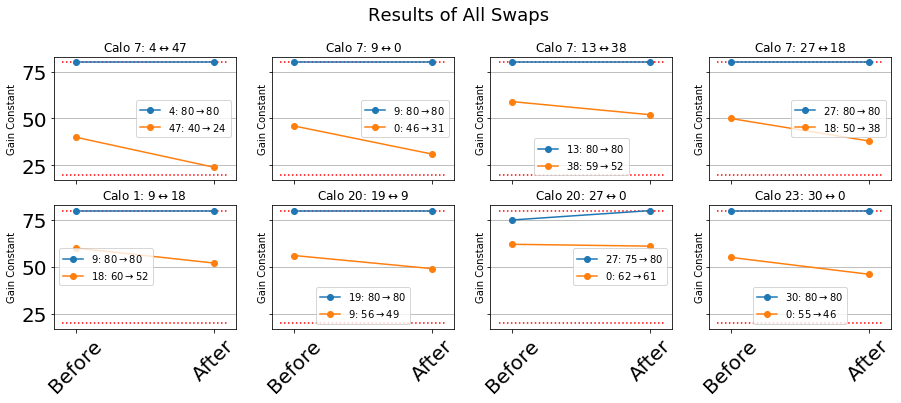

In [56]:
fig, axs = plt.subplots(2,4, figsize=(15,5), sharex=True, sharey=True)
ax = flatten2dArray(axs)
for i, swap in enumerate(crystalSwaps):
    calo = swap[0][0]
    if(swap[1][0] != calo):
        print("Error: Swap outside calo ---", swap)
        continue
    xtala = swap[0][1]
    xtalb = swap[1][1]

    ga_0 = int(gains_before[calo - 1][xtala][2])
    ga_1 = int(gains_after[calo - 1][xtala][2])
    gb_0 = int(gains_before[calo -1][xtalb][2])
    gb_1 = int(gains_after[calo - 1][xtalb][2])
    
    axi = ax[i]
    axi.plot([-0.1,1.1],[20,20],"r:")
    axi.plot([-0.1,1.1],[80,80],"r:")
    axi.plot([0,1],[ga_0, ga_1],"o-",label=str(xtala)+": "+str(ga_0)+r"$\rightarrow$"+str(ga_1))
    axi.plot([0,1],[gb_0, gb_1],"o-",label=str(xtalb)+": "+str(gb_0)+r"$\rightarrow$"+str(gb_1))
    axi.set_title(r"Calo "+str(calo)+": "+str(xtala)+r"$\leftrightarrow$"+str(xtalb))
    plt.sca(axi)
    plt.xticks(np.arange(2), ("Before", "After"), rotation=45)
    axi.set_ylabel("Gain Constant")
    axi.legend()
    axi.yaxis.grid()
    #plt.ylim(19,90)

plt.suptitle("Results of All Swaps", fontsize=18, y=1.02)    
plt.show()
        